# Salary Prediction with Machine Learning

Our problem statement: Predict if a person has a salary of greater than 50K.

## Import Libraries

In [1]:
import pandas as pd                    # Pandas is a dataframe library
import matplotlib.pyplot as plt        # This plots the data
import numpy as np                     # numpy provides n-dimesnsional object support

# do plotting inline instead of in a separate window
%matplotlib inline

## Load and review the data

In [2]:
# Use the panda read CSV function and adjust path as necessary
df = pd.read_csv("./data/Training Data.csv")

In [3]:
# Observing the data read from the CSV
df.shape

(32561, 15)

In [4]:
# Visual representation of some of the data read from the beginning
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [5]:
# Visual representation of some of the data read from the end
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32560,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [6]:
#Some columns need to be eliminated which can result in faulty results. These columns are usually duplicates or null values. Some of these columns can be correlated and need to be eliminated.

# check for null values in the data
df.isnull().values.any()

False

In [12]:
# To visualize correlations, we use the mathplot library

def plot_corr(df, size=14):
    """
    Function lots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input: Dataframe
    size: vertical and horizontal size of the plot
    
    Displays: matrix of correlation between columns. (Blue-green)->dark blue-> light green->yellow __ Less to more correlated
                                                     0------------------------------------------>1
    """
    
    # dataframe correlation function
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(size,size))
    
    # colour code the rectangles by correlation value
    ax.matshow(corr)
    
    # draw x tick marks
    plt.xticks(range(len(corr.columns)), corr.columns)
    
    # draw y tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

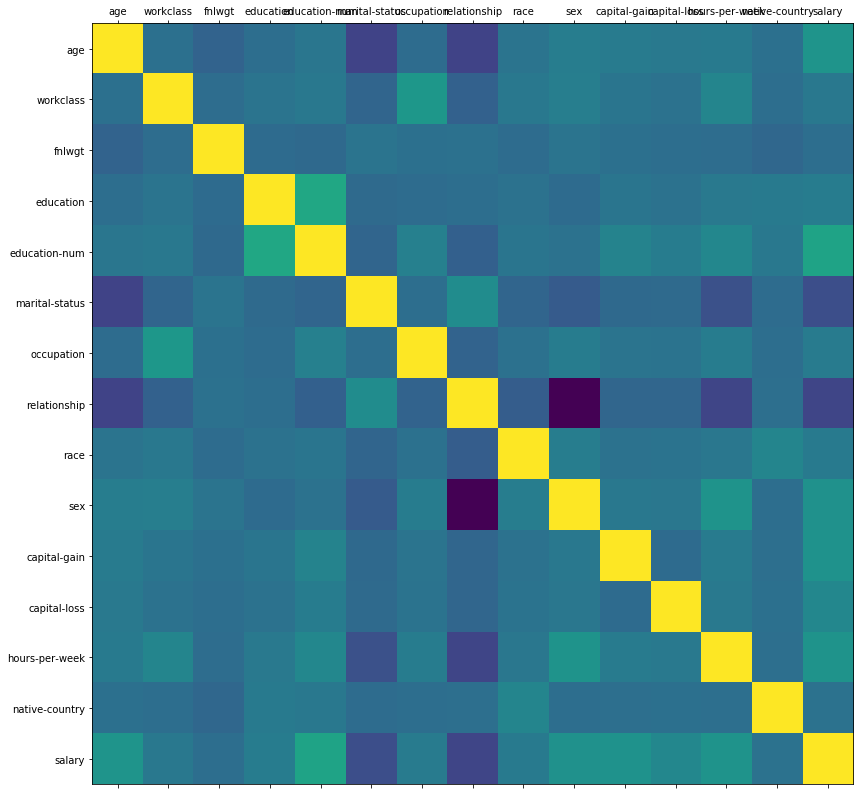

In [13]:
plot_corr(df)
# No correlation detected

If we had used the old data without molding any values then the following observation could be made:
"It can be clearly seen that we are missing quite a lot of attributes, therefore, we would need to mould the data to get all the features here. This can be done in python (but we get NAN if we map the values) or in Blue Prism"

In [14]:
# To make sure that our data is useful and has a good spread of data for >50K and <50K cases, 
# we will check this percentage.

# number of cases with > 50K
num_true = len(df.loc[df['salary'] == 1])
# number of cases with < 50K
num_false = len(df.loc[df['salary'] == 0])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false)) * 100))

Number of True cases: 7841 (24.08%)
Number of False cases: 24720 (75.92%)


## Extract Test Data

#### Split Data

In [17]:
# SciKit has a data split method.
# Import this method first
from sklearn.cross_validation import train_test_split

feature_col_names = ['age' ,'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
predicted_class_names = ['salary']

# the feature columns
X = df[feature_col_names].values

# the class column which has the value to answer our question
y = df[predicted_class_names].values

# the size of the tests: 30%
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

70% Training data and 30% Test Data

Checking if we have the desired 30% to 70% data split

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


In [20]:
# This is still insufficient in proving that the data is split correctly.
# We need to check if the predicted value (salary column value) was split evenly as well

print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['salary'] == 1]) , (len(df.loc[df['salary'] == 1])/len(df.index) * 100)))
print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['salary'] == 0]) , (len(df.loc[df['salary'] == 0])/len(df.index) * 100)))
print("")

print("Training True: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]) , (len(y_train[y_train[:] == 1])/len(y_train) * 100)))
print("Training False: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]) , (len(y_train[y_train[:] == 0])/len(y_train) * 100)))
print("")

print("Training True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]) , (len(y_test[y_test[:] == 1])/len(y_test) * 100)))
print("Training True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]) , (len(y_test[y_test[:] == 0])/len(y_test) * 100)))

Original True: 7841 (24.08%)
Original False: 24720 (75.92%)

Training True: 5527 (24.25%)
Training False: 17265 (75.75%)

Training True: 2314 (23.69%)
Training True: 7455 (76.31%)


In [21]:
# Check if there are any missing or null values after splitting the data. These null values can be hidden

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


The data has already been verified in Blue Prism but just to check if there are any latent null values, we can perform an additonal check. Logically speaking, only the age cannot be too low; the other values are justified and logical.

In [22]:
print ("Number of rows in Dataframe {0}".format(len(df)))
print("# of missing Age: {0}".format(len(df.loc[df['age'] == 0])))

Number of rows in Dataframe 32561
# of missing Age: 0


Seems like everything is okay and we won't need to impute any values as such (MIGHT NEED TO REVISIT THIS)

## Training with the Naive Bayes Algorithm

In [23]:
from sklearn.naive_bayes import GaussianNB

# create gaussian naive bayes model and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on Training Data

In [24]:
# predict the values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7924



## Performance on Testing Data

In [25]:
# predict the values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7990



#### Metrics

In [26]:
# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matix
[[7078  377]
 [1587  727]]

Classification Report
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      7455
          1       0.66      0.31      0.43      2314

avg / total       0.78      0.80      0.77      9769



Recall is horrible. Use another algorithm

## Logistic Regression Algorithm

In [40]:
# Use this algorithm since it has a parameter for shifting the balance between YES and NO cases.
# In our scenario, there are 65% YES cases and 35% NO cases which might be causing the issue.

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.5,class_weight="balanced", random_state=42)
lr_model.fit(X_train, y_train.ravel())

# predict the values using the testing data
lr_predict_test = lr_model.predict(X_test)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7655

Confusion Matix
[[5725 1730]
 [ 561 1753]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.77      0.83      7455
          1       0.50      0.76      0.60      2314

avg / total       0.81      0.77      0.78      9769



This is what we needed, but there can be other algorithms utilized. Basically, our results were affected by test data and because of that we had to change our algorithms. Basically, there should be more data or VALIDATION data in place to check that our training data is consistent and does not effect the final test data. This is known as Cross Validation and is implemented with the K-Fold Cross Validation method. This is in-built on most algorithms and can be demonstrated as follows:

## LogisticRegressionCV Algorithm

In [31]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

# predict the values using the testing data
lr_cv_predict_test = lr_cv_model.predict(X_test)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print()

# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test,lr_cv_predict_test))

Accuracy: 0.7230

Confusion Matix
[[5867 1588]
 [1118 1196]]

Classification Report
             precision    recall  f1-score   support

          0       0.84      0.79      0.81      7455
          1       0.43      0.52      0.47      2314

avg / total       0.74      0.72      0.73      9769



## Random Forest Algorithm

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print()


# predict the values using the testing data
rf_predict_test = rf_model.predict(X_test)

#Accuracy of results:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

# Get the confusion matrix to understand metrics

print("Confusion Matix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Accuracy: 0.9873

Accuracy: 0.8499

Confusion Matix
[[6956  499]
 [ 967 1347]]

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7455
          1       0.73      0.58      0.65      2314

avg / total       0.84      0.85      0.84      9769

